##  Machine Learning 
### ROC Curve

#### ROC cruve excercise


1. Test changing different values of the tree depth to visualize the effect of overfitting
2. Use the auc function to calculate the area under the ROC curve, properly interpreting the documentation of its parameters
3. Transform the ROC curve code into a function that draws it from a model, the features, and the labels of the test set.



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split

In [3]:
from sklearn.metrics import roc_curve, auc

In [4]:
bank = pd.read_csv('../../data/bank.csv', sep=";")

In [5]:
raw_features = bank.drop(columns='y')
ft_df = pd.get_dummies(raw_features)
features = ft_df.values
target = bank.y

___

Separation of the dataset into train/test that we already know

In [6]:
x_train, x_test, y_train, y_test = train_test_split(features,
                                                    target,
                                                    test_size=0.3,
                                                    stratify=target)

Train decision trees

In [7]:
tree = DecisionTreeClassifier(max_depth=5)
tree = tree.fit(x_train, y_train)
print(tree.classes_)

['no' 'yes']


The class of interest in our problem is the label 'yes', so we are interested in calculating the ratios with respect to that class. The probabilistic prediction corresponds to position 1.

In [8]:
test_pred = tree.predict_proba(x_test)
test_posprob = test_pred[:,1]

train_pred = tree.predict_proba(x_train)
train_posprob = train_pred[:,1]

___

1. To test the effect of overfitting, one can change the max_depth in the construction of the tree above

2. We calculate the area under the ROC curve using the auc function.

In [9]:
from sklearn.metrics import auc

In [10]:
fpr, tpr, thr = roc_curve(y_test, test_posprob, pos_label='yes')
auc(fpr, tpr)


0.7870044193940946

We can obtain the same thing directly with the function.

In [11]:
from sklearn.metrics import roc_auc_score

In [12]:
roc_auc_score(y_test, test_posprob)

0.7870044193940946

3.  Function to generate the ROC curve

In [13]:
def generar_roc(modelo, etiqueta_interes, features, labels,
                feat_train=None,
                labels_train=None):
    """
     - modelo: clasificador binario ya entrenado
     - etiqueta_interes: Valor de la clase binaria que queremos predecir. Ej. 'yes' o 'positiva'
     - features, labels: Características y etiquetas de test
     - feat_train, labels_train: opcionales por si queremos incluir la ROC de entrenamiento 
    """
    # hacemos la prediccion sobre la clase de interes
    id_interes = np.where(modelo.classes_ == etiqueta_interes)[0][0]
    prob = modelo.predict_proba(features)
    interes_prob = prob[:,id_interes]
    
    # pedimos los ratios para diferentes umbrales
    fpr, tpr, thr = roc_curve(labels, interes_prob, pos_label=etiqueta_interes)
    
    # Calculamos lo mismo para train, si nos han pasado dichos parametros
    if feat_train is not None:
        prob_train = modelo.predict_proba(feat_train)
        pos_prob_train = prob_train[:,id_interes]
        fpr_train, tpr_train, _ = roc_curve(labels_train, 
                                            pos_prob_train, 
                                            pos_label=etiqueta_interes)
    
    # Hacemos la gráfica
    fig, ax = plt.subplots(figsize=(5,5))
    plt.plot(fpr, tpr, color='r', label='test')
    
    if feat_train is not None:
        plt.plot(fpr_train, tpr_train, color='g', label='train')

    plt.plot([0,1],[0,1])
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0,1.0])
    plt.legend(loc='lower right')

We try the function

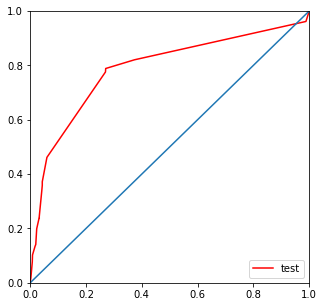

In [14]:
generar_roc(tree, 'yes', x_test, y_test)

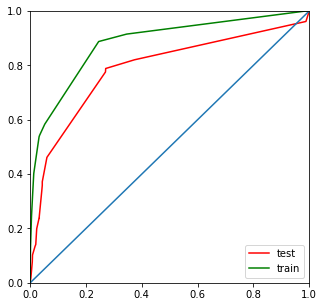

In [15]:
generar_roc(tree, 'yes', x_test, y_test,
            feat_train=x_train,
            labels_train=y_train)


___